<a href="https://colab.research.google.com/github/yukinaga/bayesian_statistics/blob/main/section_3/02_max_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最尤推定
データから尤度が最大になる確率分布のパラメータを求めることを「最尤推定」といいます。  
今回は、最尤推定のイメージをPythonのコードと共に学びます。

## 尤度とパラメータ
グラフを使って、正規分布を想定した際の尤度の最大値を確認します。  
以下のコードでは、平均値を固定して標準偏差を変化させた場合の、対数尤度の変化をグラフに表示します。  
Section2で解説しましたが、対数尤度は以下の式で表されます。   
 $$\log{L} = \sum_{k=1}^n \log p(x_k)$$  
 $\mu$は平均値で、$\sigma$は標準偏差です。 

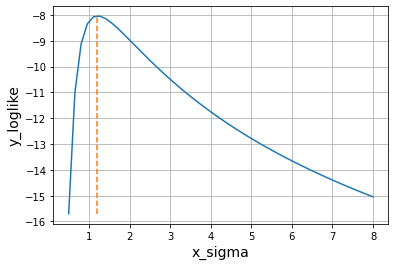

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1.2, 2.3, 4.5, 1.9, 3.7])  # データ
 
mu = np.average(x_data)  # 平均値
sigma = np.std(x_data)  # 標準偏差

def pdf(x, mu, sigma):  # 確率密度関数
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))

def log_likelihood(p):  # 対数尤度
    return np.sum(np.log(p))

x_sigma = np.linspace(0.5, 8)   # 横軸: 標準偏差を0.5から8まで変化させる
y_loglike = []  # 縦軸: 対数尤度

for s in x_sigma:
    log_like = log_likelihood(pdf(x_data, mu, s))
    y_loglike.append(log_like)  # 対数尤度を縦軸に追加

plt.plot(x_sigma, np.array(y_loglike))
plt.plot([sigma, sigma], [min(y_loglike), max(y_loglike)], linestyle="dashed")  # データの標準偏差の位置に縦線を引く
          
plt.xlabel("x_sigma", size=14)
plt.ylabel("y_loglike", size=14)
plt.grid()

plt.show()

上記のグラフで、横軸が標準偏差で縦軸が対数尤度で、点線はデータの標準偏差を表します。  
正規分布の標準偏差により対数尤度が滑らかに変化する様子を見ることができます。  

点線はデータの標準偏差を表しますが、このとき縦軸の対数尤度は最大になっていることが確認できます。  
対数尤度が最大であることは、尤度が最大であることを意味します。   
このような最尤推定により、データから最も妥当性の高い確率分布のパラメータを推定することができます。